itr=  0 cost= 132210.3996461238
itr=  1 cost= 84626.35732344464
itr=  2 cost= 54172.64927958871
itr=  3 cost= 34682.17114639684
itr=  4 cost= 22208.1249040347
itr=  5 cost= 14224.584203616907
itr=  6 cost= 9114.967018832647
itr=  7 cost= 5844.6656793817365
itr=  8 cost= 3751.533342848077
itr=  9 cost= 2411.796789631695
itr=  10 cost= 1554.2412837659938
itr=  11 cost= 1005.2892068329171
itr=  12 cost= 653.8505450318584
itr=  13 cost= 428.82728435359917
itr=  14 cost= 284.71626776357976
itr=  15 cost= 192.39504755884317
itr=  16 cost= 133.22484351669308
itr=  17 cost= 95.27644255979261
itr=  18 cost= 70.91477748723037
itr=  19 cost= 55.25305831190486
itr=  20 cost= 45.16341613714744
itr=  21 cost= 38.64371443572334
itr=  22 cost= 34.41230714137092
itr=  23 cost= 31.648682550861263
itr=  24 cost= 29.82747409800969
itr=  25 cost= 28.612225938177115
itr=  26 cost= 27.787401656973778
itr=  27 cost= 27.214868641307845
itr=  28 cost= 26.806046945177044
itr=  29 cost= 26.504083505401674
itr=  3

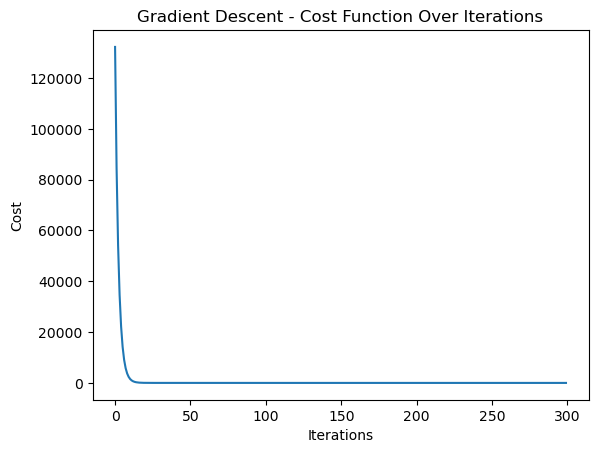

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

def step_gradient(X, Y, m, learning_rate):
    m_slope = np.zeros(len(X[0]))
    for i in range(len(X)):
        x = X[i]
        y = Y[i]
        for j in range(len(x)):
            m_slope[j] += (-2/len(X)) * (y - sum(m*x)) * x[j]
    new_m = m - (learning_rate * m_slope)
    return new_m

def cost(m, x, y):
    cost = 0
    for i in range(len(x)):
        cost += (1/len(x)) * ((y[i] - sum(m*x[i]))**2)
    return cost

def gd(x, y, learning_rate, iterations):
    m = np.zeros(len(x[0]))
    cost_history = []

    for i in range(iterations):
        m = step_gradient(x, y, m, learning_rate)
        current_cost = cost(m, x, y)
        cost_history.append(current_cost)
        print("itr= ", i, "cost=", current_cost)

    # Plot the cost function over iterations
    plt.plot(range(iterations), cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Gradient Descent - Cost Function Over Iterations')
    plt.show()

    return m

def gradient_descent(x, y):
    iterations = 300
    learning_rate = 0.1
    x = np.append(x, np.ones(len(x)).reshape(-1, 1), axis=1)
    m = gd(x, y, learning_rate, iterations)
    return m

# Load training and testing data
training = np.loadtxt("D:\\Data Science Projects\\Gradient descent on Boston Data set\\Training Data for combined cycle power plant dataset.csv", delimiter=',')
testing = np.loadtxt("D:\\Data Science Projects\\Gradient descent on Boston Data set\\Xtest for combined cycle power plant dataset.csv", delimiter=',')

# Extract features and target variable from training data
x = training[:, :-1]
y = training[:, -1]

# Adding squared values of each column
sq = []
for i in x:
    sq.append(i**2)
sq = np.array(sq)
x = np.append(x, sq, axis=1)

# Standardize the features
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# Perform gradient descent
m = gradient_descent(x, y)

# Process testing data
sq = []
for i in testing:
    sq.append(i**2)
sq = np.array(sq)
testing = np.append(testing, sq, axis=1)

testing1 = scaler.transform(testing)
x_test = np.append(testing1, np.ones(len(testing1)).reshape(-1, 1), axis=1)

# Make predictions
ans = []
for i in x_test:
    ans.append(sum(i*m))

# Save the predictions to a file
ans = np.array(ans)
np.savetxt(X=ans, fname='Prediction.csv', delimiter=',', fmt='%.5f')
